# New Section

In [1]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/ETH-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,763.369995,786.789978,760.934998,773.835999,773.835999,2201159936
1,2017-12-27,774.969971,789.252991,738.413025,762.841980,762.841980,2100029952
2,2017-12-28,762.208008,763.318970,701.187012,737.023010,737.023010,2389149952
3,2017-12-29,740.388977,770.117004,729.607971,753.591980,753.591980,2648969984
4,2017-12-30,753.815002,753.815002,685.231018,717.257019,717.257019,3187780096
...,...,...,...,...,...,...,...
1822,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739
1823,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923
1824,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345
1825,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,1218.962036,3942720070


In [3]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
1822,2022-12-22,1218.182129
1823,2022-12-23,1220.159424
1824,2022-12-24,1221.148560
1825,2022-12-25,1218.962036
1826,2022-12-26,1219.282593


In [4]:
df['Time'] = np.arange(len(df.index))
df.tail()

<ipython-input-4-7104d57264a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = np.arange(len(df.index))


,Date,Close,Time
1822,2022-12-22,1218.182129,1822
1823,2022-12-23,1220.159424,1823
1824,2022-12-24,1221.148560,1824
1825,2022-12-25,1218.962036,1825
1826,2022-12-26,1219.282593,1826


In [5]:
df['Date_New'] = pd.to_datetime(df.Date)
type(df['Date_New'])

<ipython-input-5-a1d1c68ad423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_New'] = pd.to_datetime(df.Date)


pandas.core.series.Series

In [6]:
df.index = df['Date_New']
df

,Date,Close,Time,Date_New
Date_New,,,,
2017-12-26,2017-12-26,773.835999,0,2017-12-26
2017-12-27,2017-12-27,762.841980,1,2017-12-27
2017-12-28,2017-12-28,737.023010,2,2017-12-28
2017-12-29,2017-12-29,753.591980,3,2017-12-29
2017-12-30,2017-12-30,717.257019,4,2017-12-30
...,...,...,...,...
2022-12-22,2022-12-22,1218.182129,1822,2022-12-22
2022-12-23,2022-12-23,1220.159424,1823,2022-12-23
2022-12-24,2022-12-24,1221.148560,1824,2022-12-24


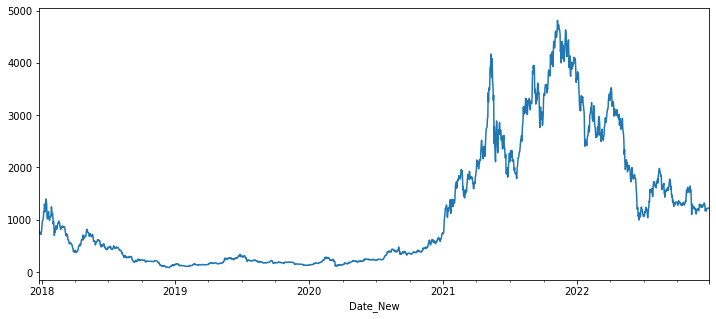

In [7]:
df['Close'].plot(figsize=(12,5))

In [8]:
no_of_predictions = 30
Date_future = pd.date_range(start = "27/12/2022",end = "25/01/2023")
X = np.array(df.Time, dtype = float)
y = np.array(df.Close, dtype = float)
Z = [1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865]

In [9]:
coefs = poly.polyfit(X, y, 9)
x_new = np.linspace(X[0], X[-1] + no_of_predictions, num = len(X) + no_of_predictions)
ffit = poly.polyval(x_new, coefs)
fit = poly.polyval(y, coefs)
pred = poly.polyval(Z, coefs)
predictions = pd.DataFrame(Date_future,pred)
print(predictions)

                     0
1367.626097 2022-12-27
1368.290661 2022-12-28
1368.835157 2022-12-29
1369.254455 2022-12-30
1369.543342 2022-12-31
1369.696530 2023-01-01
1369.708648 2023-01-02
1369.574247 2023-01-03
1369.287797 2023-01-04
1368.843684 2023-01-05
1368.236215 2023-01-06
1367.459611 2023-01-07
1366.508011 2023-01-08
1346.016127 2023-01-09
1342.727951 2023-01-10
1339.187625 2023-01-11
1335.388127 2023-01-12
1331.322344 2023-01-13
1326.983065 2023-01-14
1322.362985 2023-01-15
1317.454700 2023-01-16
1312.250712 2023-01-17
1306.743420 2023-01-18
1300.925128 2023-01-19
1294.788036 2023-01-20
1288.324246 2023-01-21
1281.525758 2023-01-22
1274.384468 2023-01-23
1266.892170 2023-01-24
1259.040553 2023-01-25


In [10]:
date_new = df.index.append(Date_future)
date_new

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04',
               ...
               '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23',
               '2023-01-24', '2023-01-25'],
              dtype='datetime64[ns]', length=1857, freq=None)

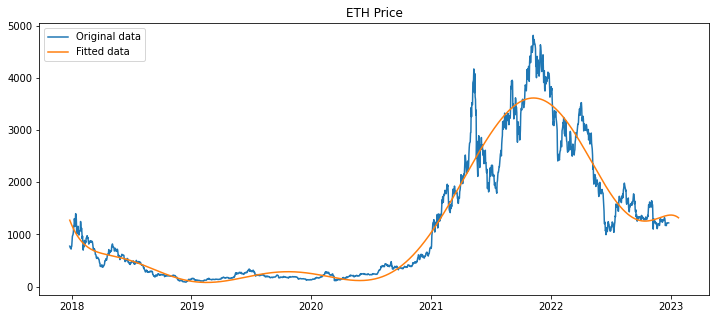

In [11]:
plt.figure(figsize = (12,5))
plt.title('ETH Price')
plt.plot(df['Date_New'], y, label = "Original data")
plt.plot(date_new, ffit, label = "Fitted data")
plt.legend(loc = 'upper left')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_percentage_error(df['Close'],fit)
mae = mean_absolute_error(df['Close'],fit)
print("MAPE: ", mape * 100)
print("MAE: ", mae)


MAPE:  5904166.049713916
MAE:  253653363.49618247


In [13]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Close'],fit)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)


RMSE:  1410338535.1609943
